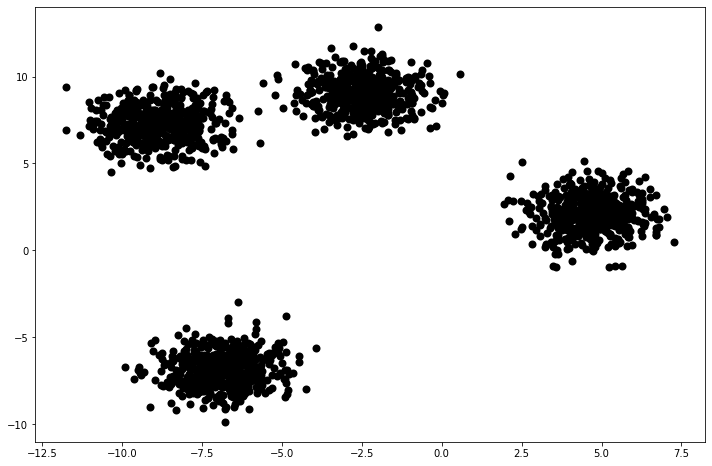

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, n_samples=2000, n_features=2, shuffle=True, random_state=42)
clusters = len(np.unique(y))

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1], marker="o", color="black", linewidth=2)


In [86]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


class KMeans:
    
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        
        # mean feature vector for each cluster
        self.centroids = []
    
    
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # init centroids from data locations; pick self.K number of random true locations
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # Optimization loop
        for _ in range(self.max_iters):
            
            # update cluters
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()
                
            # update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            if self.plot_steps:
                self.plot()
                
            # check for convergence
            if self._is_converged(centroids_old, self.centroids):
                break
            
        # classify samples according to clustering results
        return self._get_cluster_labels(self.clusters)
    
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
        
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    
    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features)) # sizes must be a tuple
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        for i, idx in enumerate(self.clusters):
            point = self.X[idx].T
            ax.scatter(*point)
        
        for point in self.centroids:
            ax.scatter(*point, marker="o", color="black", linewidth=2)
            
        plt.show()

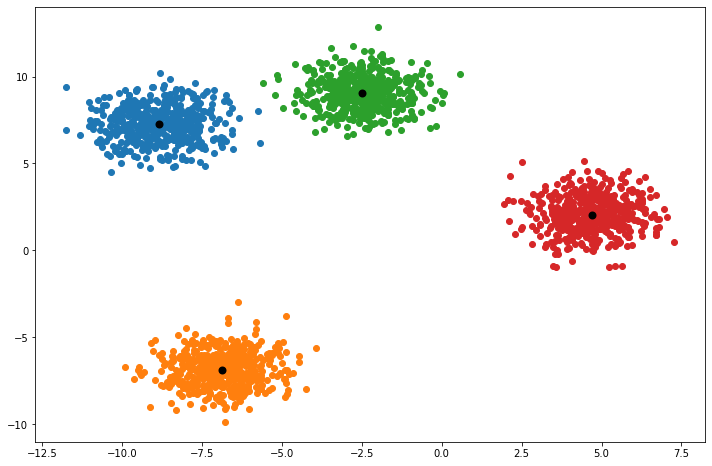

0.0005


In [87]:
k = KMeans(K=clusters, max_iters=10000, plot_steps=False)
y_pred = k.predict(X)
#print(y_pred)

k.plot()

print(np.mean(y_pred==y))
        